# Base Model

## Dataset Access

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # You can replace with any model
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [2]:
Breast_cancer=pd.read_csv(r"C:\Users\amits\OneDrive\Documents\Project116\breast-cancer116.csv")
print(Breast_cancer.head())

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


## Null Check

In [3]:
Breast_cancer.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

## Normalization

In [4]:
# Separate features and target
G = Breast_cancer.drop('Classification', axis=1)  # Assuming 'Classification' is the target column
H = Breast_cancer['Classification']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
G_normalized = scaler.fit_transform(G)

# Convert back to a DataFrame for easy viewing (optional)
G_normalized_df = pd.DataFrame(G_normalized, columns=G.columns)

# Add the target column back if needed
normal_form = pd.concat([G_normalized_df, H.reset_index(drop=True)], axis=1)

# View the normalized dataset
print(normal_form.head())


        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1  0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2  0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   
3  0.676923  0.148328  0.120567  0.014171  0.005911  0.064811     0.151538   
4  0.953846  0.135640  0.226950  0.019936  0.013748  0.027782     0.086940   

   Resistin     MCP.1  Classification  
0  0.060665  0.224659               1  
1  0.010826  0.255926               1  
2  0.076906  0.307912               1  
3  0.121131  0.533934               1  
4  0.093375  0.440565               1  


## Kfold

In [5]:
# Step 1: Separate features and target
G = normal_form.drop('Classification', axis=1)
H = normal_form['Classification']

# Step 2: Initialize Stratified K-Fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 3: Define your model (you can change to other classifiers)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform cross-validation
scores = cross_val_score(model, G, H, cv=kfold, scoring='accuracy')

# Step 5: Print results
print("🔁 10-Fold Cross-Validation Results (Random Forest):")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")
print("All Fold Accuracies:")
for i, score in enumerate(scores, 1):
    print(f"  Fold {i}: {score:.4f}")


🔁 10-Fold Cross-Validation Results (Random Forest):
Mean Accuracy: 0.7356
Standard Deviation: 0.1531
All Fold Accuracies:
  Fold 1: 0.8333
  Fold 2: 0.8333
  Fold 3: 0.7500
  Fold 4: 0.6667
  Fold 5: 0.6667
  Fold 6: 0.3333
  Fold 7: 0.9091
  Fold 8: 0.8182
  Fold 9: 0.8182
  Fold 10: 0.7273


## Classification

In [6]:
# Step 3: Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 4: Evaluate each classifier and show only mean accuracy
print("📊 Average Accuracy of All Classifiers (10-Fold CV):")
for name, model in classifiers.items():
    scores = cross_val_score(model, G, H, cv=kfold, scoring='accuracy')
    print(f"✅ {name}: {scores.mean():.4f}")


📊 Average Accuracy of All Classifiers (10-Fold CV):
✅ Logistic Regression: 0.6409
✅ K-Nearest Neighbors: 0.7091
✅ SVM (RBF Kernel): 0.7265
✅ Naive Bayes: 0.6371
✅ Decision Tree: 0.7280
✅ Random Forest: 0.7356
✅ Extra Trees: 0.7439
✅ AdaBoost: 0.7265
✅ Gradient Boosting: 0.7705


# Propose Model

## Data Access

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # You can replace with any model
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [8]:
Project116=pd.read_csv(r"C:\Users\amits\OneDrive\Documents\Project116\breast-cancer116.csv")
print(Project116.head())

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


## Null Check

In [9]:
Project116.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [10]:
Project116.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

## Outlier Remove

In [11]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# ✅ Create a fresh copy of the original dataset
Project116_cleaned = Project116.copy()

# ✅ Optional: Ensure only numeric features are used for outlier detection (int + float)
numeric_features = Project116_cleaned.select_dtypes(include=['int64', 'float64']).drop(columns=['Classification'])

# ✅ Convert to NumPy array
X = numeric_features.to_numpy()

# ✅ Initialize and fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X)

# ✅ Predict outliers (-1 = outlier, 1 = inlier)
y_pred = iforest.predict(X)

# ✅ Filter and keep only the inliers (i.e., predicted as 1)
Project116_cleaned_final = Project116_cleaned.loc[y_pred == 1].reset_index(drop=True)

# ✅ Print summary of the cleaning process
print("✅ Outlier removal complete!")
print(f"Original dataset size: {Project116_cleaned.shape[0]} rows")
print(f"Cleaned dataset size: {Project116_cleaned_final.shape[0]} rows")
print(f"Outliers removed: {Project116_cleaned.shape[0] - Project116_cleaned_final.shape[0]}")

# ✅ Check class distribution after outlier removal
print("\nClass distribution after outlier removal:")
print(Project116_cleaned_final['Classification'].value_counts())


✅ Outlier removal complete!
Original dataset size: 116 rows
Cleaned dataset size: 104 rows
Outliers removed: 12

Class distribution after outlier removal:
Classification
2    55
1    49
Name: count, dtype: int64


## Normalization Perform

In [13]:
# Separate features and target
X = Project116_cleaned_final.drop('Classification', axis=1)  # Assuming 'Classification' is the target column
y = Project116_cleaned_final['Classification']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert back to a DataFrame for easy viewing (optional)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target column back if needed
normalized_data = pd.concat([X_normalized_df, y.reset_index(drop=True)], axis=1)

# View the normalized dataset
print(normalized_data.head())


        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.359375  0.253850  0.108696  0.007969  0.000000  0.063869     0.237932   
1  0.906250  0.114826  0.347826  0.019793  0.025839  0.064390     0.102517   
2  0.890625  0.235278  0.336957  0.059870  0.058503  0.193595     0.641334   
3  0.671875  0.148328  0.184783  0.023009  0.015678  0.079148     0.157667   
4  0.953125  0.135640  0.347826  0.032369  0.036465  0.033928     0.083185   

   Resistin     MCP.1  Classification  
0  0.094841  0.224659               1  
1  0.016925  0.255926               1  
2  0.120233  0.307912               1  
3  0.189371  0.533934               1  
4  0.145979  0.440565               1  


In [14]:
Project116_cleaned_final

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
99    75  30.480000      152    7.010  2.628283  50.5300    10.060000   
100   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
101   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
102   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
103   72  25.590000       82    2.820  0.570392  24.9600    33.750000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  
2     9.27715  554.697               1  
3    12.76600  928.220               1  
4    10.57635  773.920               1  
..        ...      ...             ...  
99   11.73000   99.450               2  
100  10.96000  268.230               2  
101   7.32000  330.160               2  
102  10.33000  314.050               2  
103   3.27000  392.460               2  

[104 rows x 10 columns]

## Check data imbalancing

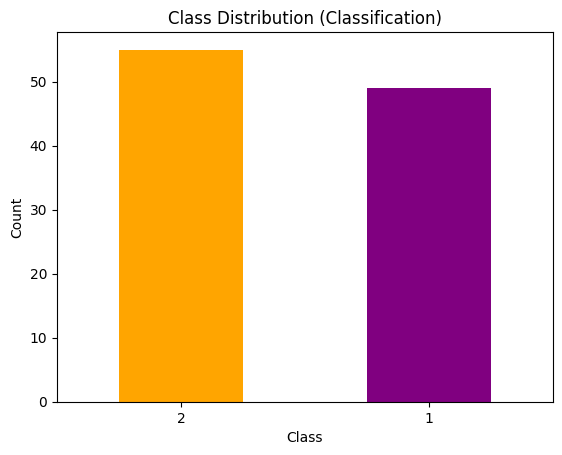

In [15]:
y.value_counts().plot(kind='bar', color=['orange', 'purple'])
plt.title("Class Distribution (Classification)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


## Data Balancing


📏 Original shape: 104 samples, 9 features

🟠 Class distribution BEFORE SMOTE:
  Class 1: 49 samples
  Class 2: 55 samples

🟢 Class distribution AFTER SMOTE:
  Class 1: 55 samples
  Class 2: 55 samples

📏 Shape after SMOTE: 110 samples, 9 features

✅ Preview of balanced dataset:
        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.359375  0.253850  0.108696  0.007969  0.000000  0.063869     0.237932   
1  0.906250  0.114826  0.347826  0.019793  0.025839  0.064390     0.102517   
2  0.890625  0.235278  0.336957  0.059870  0.058503  0.193595     0.641334   
3  0.671875  0.148328  0.184783  0.023009  0.015678  0.079148     0.157667   
4  0.953125  0.135640  0.347826  0.032369  0.036465  0.033928     0.083185   

   Resistin     MCP.1  Classification  
0  0.094841  0.224659               1  
1  0.016925  0.255926               1  
2  0.120233  0.307912               1  
3  0.189371  0.533934               1  
4  0.145979  0.440565               1  


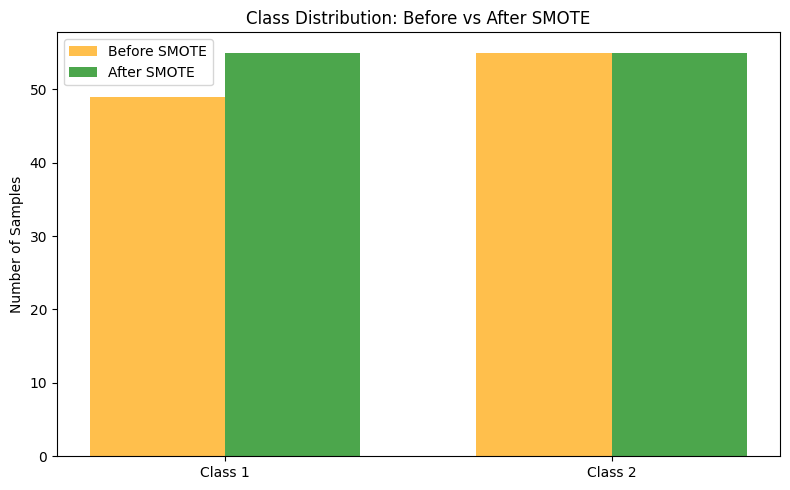

In [16]:
# ✅ Step 1: Separate features and target from normalized dataset
A = normalized_data.drop('Classification', axis=1)  # Features
B = normalized_data['Classification']               # Target

print(f"\n📏 Original shape: {A.shape[0]} samples, {A.shape[1]} features")

# ✅ Step 2: Check class distribution before SMOTE
before_counts = Counter(B)
print("\n🟠 Class distribution BEFORE SMOTE:")
for cls, count in before_counts.items():
    print(f"  Class {cls}: {count} samples")

# ✅ Step 3: Initialize and apply SMOTE
smote = SMOTE(random_state=42)
A_resampled, B_resampled = smote.fit_resample(A, B)

# ✅ Step 4: Check class distribution after SMOTE
after_counts = Counter(B_resampled)
print("\n🟢 Class distribution AFTER SMOTE:")
for cls, count in after_counts.items():
    print(f"  Class {cls}: {count} samples")

print(f"\n📏 Shape after SMOTE: {A_resampled.shape[0]} samples, {A_resampled.shape[1]} features")

# ✅ Step 5: Create final balanced DataFrame
balanced_data = pd.concat([
    pd.DataFrame(A_resampled, columns=A.columns),
    pd.Series(B_resampled, name='Classification')
], axis=1)

# ✅ Step 6: Preview balanced data
print("\n✅ Preview of balanced dataset:")
print(balanced_data.head())

# 📊 Step 7: Plot class distribution comparison
labels = sorted(before_counts.keys())  # Ensure consistent label order
x = range(len(labels))
before = [before_counts[l] for l in labels]
after = [after_counts[l] for l in labels]
label_names = [f"Class {l}" for l in labels]

plt.figure(figsize=(8, 5))
plt.bar(x, before, width=0.35, label='Before SMOTE', color='orange', alpha=0.7)
plt.bar([i + 0.35 for i in x], after, width=0.35, label='After SMOTE', color='green', alpha=0.7)
plt.xticks([i + 0.175 for i in x], label_names)
plt.ylabel("Number of Samples")
plt.title("Class Distribution: Before vs After SMOTE")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
print("Class distribution after SMOTE:", Counter(B_resampled))
print("Shape after SMOTE:", A_resampled.shape)


Class distribution after SMOTE: Counter({1: 55, 2: 55})
Shape after SMOTE: (110, 9)


## Feature Selection

🔎 Top features by importance:

       Feature  Importance
2      Glucose    0.189639
0          Age    0.155016
7     Resistin    0.149312
1          BMI    0.118586
5       Leptin    0.093984
4         HOMA    0.085184
6  Adiponectin    0.078205
3      Insulin    0.074588
8        MCP.1    0.055487


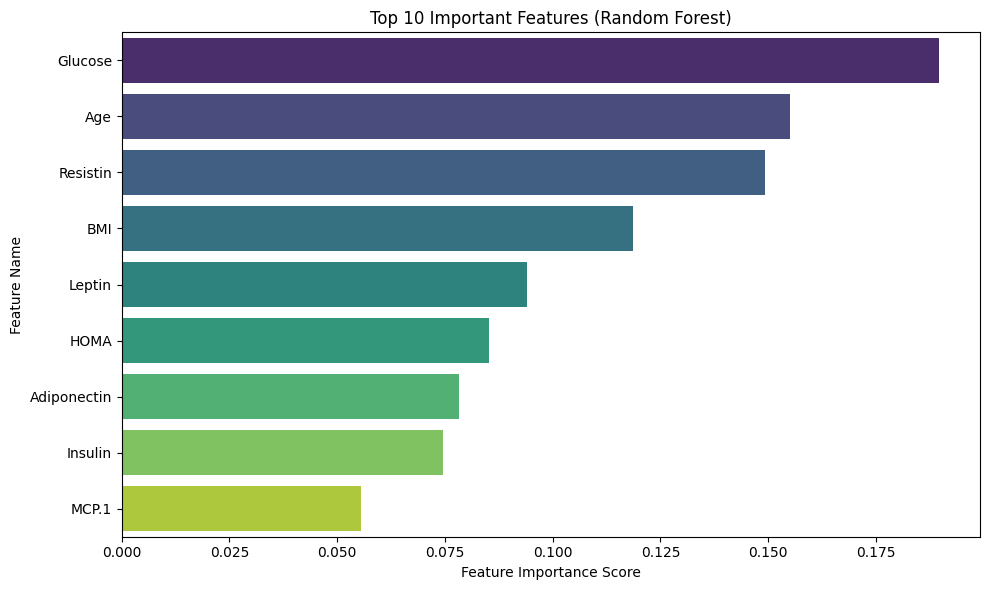

In [18]:
# ✅ Step 1: Separate features and target
C = balanced_data.drop(columns=['Classification'])  # Features
D = balanced_data['Classification']                 # Target

# ✅ Step 2: Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(C, D)

# ✅ Step 3: Get feature importances
importances = rf.feature_importances_
feature_names = C.columns

# ✅ Step 4: Create DataFrame of feature importances
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ✅ Step 5: Display top features
print("🔎 Top features by importance:\n")
print(feature_df)

# ✅ Step 6: Select top N features
top_n = 10  # You can adjust this
selected_features = feature_df['Feature'].head(top_n).tolist()

# ✅ Step 7: Filter the dataset to keep only top N features
C_selected = C[selected_features]

# ✅ Step 8: Combine selected features with target
selected_data = pd.concat([C_selected, D.reset_index(drop=True)], axis=1)

# ✅ Step 9: Plot top feature importances (with future-proof hue fix)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_df.head(top_n),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title(f"Top {top_n} Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


In [19]:
selected_data


Glucose       Age  Resistin       BMI    Leptin      HOMA  Adiponectin  \
0    0.108696  0.359375  0.094841  0.253850  0.063869  0.000000     0.237932   
1    0.347826  0.906250  0.016925  0.114826  0.064390  0.025839     0.102517   
2    0.336957  0.890625  0.120233  0.235278  0.193595  0.058503     0.641334   
3    0.184783  0.671875  0.189371  0.148328  0.079148  0.015678     0.157667   
4    0.347826  0.953125  0.145979  0.135640  0.033928  0.036465     0.083185   
..        ...       ...       ...       ...       ...       ...          ...   
105  0.436866  0.583442  0.298557  0.402183  0.253120  0.086779     0.033653   
106  0.272435  0.171875  0.138094  0.548275  0.142880  0.055390     0.185526   
107  0.340745  0.882457  0.116788  0.232045  0.182482  0.057199     0.619111   
108  0.289114  0.142716  0.076547  0.661978  0.367059  0.053511     0.178622   
109  0.230338  0.202951  0.079212  0.139385  0.143013  0.061715     0.437058   

      Insulin     MCP.1  Classification  
0    0.007969  0.224659               1  
1    0.019793  0.255926               1  
2    0.059870  0.307912               1  
3    0.023009  0.533934               1  
4    0.032369  0.440565               1  
..        ...       ...             ...  
105  0.078683  0.197477               1  
106  0.065585  0.299968               1  
107  0.057938  0.293226               1  
108  0.060200  0.331894               1  
109  0.077259  0.116596               1  

[110 rows x 10 columns]

## KFold

####  This kfold perform on full dataset

In [20]:
# ✅ Step 1: Separate features and target from selected_data
E = selected_data.drop(columns=['Classification'])  # Features
F = selected_data['Classification']                 # Target

# ✅ Step 2: Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ✅ Step 3: Define your model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# ✅ Step 4: Evaluate model using cross_val_score
scores = cross_val_score(model, E, F, cv=kfold, scoring='accuracy')

# ✅ Step 5: Print results
print("📊 10-Fold Cross-Validation Results (Random Forest):")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")
print("All Fold Accuracies:")
for i, score in enumerate(scores, 1):
    print(f"  Fold {i}: {score:.4f}")


📊 10-Fold Cross-Validation Results (Random Forest):
Mean Accuracy: 0.7455
Standard Deviation: 0.1666
All Fold Accuracies:
  Fold 1: 0.8182
  Fold 2: 0.8182
  Fold 3: 0.5455
  Fold 4: 0.8182
  Fold 5: 0.9091
  Fold 6: 1.0000
  Fold 7: 0.4545
  Fold 8: 0.5455
  Fold 9: 0.7273
  Fold 10: 0.8182


#### This is Train-Test Split + Cross-Validation , perform on just training set data

In [21]:
# Step 1: Split into Train and Test
E_train, E_test, F_train, F_test = train_test_split(E, F, test_size=0.2, stratify=F, random_state=42)

# Step 2: K-Fold on training data
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Cross-validation on train split
cv_scores = cross_val_score(model, E_train, F_train, cv=kfold, scoring='accuracy')

print("🔁 10-Fold CV on Training Set:")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev: {cv_scores.std():.4f}")
print("All CV Fold Accuracies:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

# Step 4: Final test on untouched test set
model.fit(E_train, F_train)
test_accuracy = model.score(E_test, F_test)
print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")


🔁 10-Fold CV on Training Set:
Mean Accuracy: 0.6931
Std Dev: 0.0871
All CV Fold Accuracies:
  Fold 1: 0.5556
  Fold 2: 0.6667
  Fold 3: 0.7778
  Fold 4: 0.5556
  Fold 5: 0.7778
  Fold 6: 0.6667
  Fold 7: 0.7778
  Fold 8: 0.7778
  Fold 9: 0.6250
  Fold 10: 0.7500

✅ Final Test Accuracy: 0.8636


## Classification

#### Kfold use of all classifier

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Step 1: Split into Train and Test
E_train, E_test, F_train, F_test = train_test_split(E, F, test_size=0.2, stratify=F, random_state=42)

# Step 2: Define 10-fold StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 3: Define classifiers to test
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 4: Evaluate each classifier
for name, model in classifiers.items():
    print(f"\n🔍 {name}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, E_train, F_train, cv=kfold, scoring='accuracy')
    print("🔁 10-Fold CV on Training Set:")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Std Dev: {cv_scores.std():.4f}")
    print("All Fold Accuracies:")
    for i, score in enumerate(cv_scores, 1):
        print(f"  Fold {i}: {score:.4f}")
    
    # Fit and test
    model.fit(E_train, F_train)
    test_accuracy = model.score(E_test, F_test)
    print(f"✅ Final Test Accuracy: {test_accuracy:.4f}")



🔍 Logistic Regression
🔁 10-Fold CV on Training Set:
Mean Accuracy: 0.6833
Std Dev: 0.1549
All Fold Accuracies:
  Fold 1: 0.6667
  Fold 2: 0.6667
  Fold 3: 0.5556
  Fold 4: 0.3333
  Fold 5: 0.6667
  Fold 6: 0.7778
  Fold 7: 0.7778
  Fold 8: 0.8889
  Fold 9: 0.8750
  Fold 10: 0.6250
✅ Final Test Accuracy: 0.7727

🔍 K-Nearest Neighbors
🔁 10-Fold CV on Training Set:
Mean Accuracy: 0.6597
Std Dev: 0.0973
All Fold Accuracies:
  Fold 1: 0.7778
  Fold 2: 0.6667
  Fold 3: 0.5556
  Fold 4: 0.4444
  Fold 5: 0.7778
  Fold 6: 0.6667
  Fold 7: 0.6667
  Fold 8: 0.6667
  Fold 9: 0.7500
  Fold 10: 0.6250
✅ Final Test Accuracy: 0.9545

🔍 SVM (RBF Kernel)
🔁 10-Fold CV on Training Set:
Mean Accuracy: 0.7278
Std Dev: 0.1249
All Fold Accuracies:
  Fold 1: 0.8889
  Fold 2: 0.6667
  Fold 3: 0.5556
  Fold 4: 0.5556
  Fold 5: 0.8889
  Fold 6: 0.7778
  Fold 7: 0.7778
  Fold 8: 0.6667
  Fold 9: 0.8750
  Fold 10: 0.6250
✅ Final Test Accuracy: 0.9091

🔍 Naive Bayes
🔁 10-Fold CV on Training Set:
Mean Accuracy: 0.69

#### This is perform on without kfold

In [23]:
# Define classifiers with random_state where applicable
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),  # no random_state needed
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),  # no random_state needed
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Store results
accuracy_results = {}

# Train and evaluate each classifier
print("📊 Test Accuracy of All Classifiers (No Cross-Validation):")
for name, model in classifiers.items():
    model.fit(E_train, F_train)
    predictions = model.predict(E_test)
    acc = accuracy_score(F_test, predictions)
    accuracy_results[name] = acc
    print(f"✅ {name}: {acc:.4f}")

# Show highest and lowest accuracy
best_model = max(accuracy_results, key=accuracy_results.get)
worst_model = min(accuracy_results, key=accuracy_results.get)

print(f"\n🏆 Highest Accuracy: {best_model} ({accuracy_results[best_model]:.4f})")
print(f"🔻 Lowest Accuracy: {worst_model} ({accuracy_results[worst_model]:.4f})")


📊 Test Accuracy of All Classifiers (No Cross-Validation):
✅ Logistic Regression: 0.7727
✅ K-Nearest Neighbors: 0.9545
✅ SVM (RBF Kernel): 0.9091
✅ Naive Bayes: 0.7273
✅ Decision Tree: 0.8182
✅ Random Forest: 0.8636
✅ Extra Trees: 0.7273
✅ AdaBoost: 0.7727
✅ Gradient Boosting: 0.7727

🏆 Highest Accuracy: K-Nearest Neighbors (0.9545)
🔻 Lowest Accuracy: Naive Bayes (0.7273)


## Confuision Matrix

In [24]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

evaluation_results = {}

for name, model in classifiers.items():
    model.fit(E_train, F_train)
    predictions = model.predict(E_test)

    # Probabilities for ROC AUC
    try:
        probs = model.predict_proba(E_test)[:, 1]
    except AttributeError:
        probs = model.decision_function(E_test)

    acc = accuracy_score(F_test, predictions)
    cm = confusion_matrix(F_test, predictions)
    precision = precision_score(F_test, predictions, average='binary')
    recall = recall_score(F_test, predictions, average='binary')
    f1 = f1_score(F_test, predictions, average='binary')
    roc_auc = roc_auc_score(F_test, probs)

    result = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }

    evaluation_results[name] = result

# Print evaluation results
print("📊 Detailed Classifier Evaluation:\n")
for name, result in evaluation_results.items():
    print(f"✅ {name}")
    print(f"🔹 Accuracy   : {result['Accuracy']:.4f}")
    print(f"🔹 Precision  : {result['Precision']:.4f}")
    print(f"🔹 Recall     : {result['Recall']:.4f}")
    print(f"🔹 F1-Score   : {result['F1-Score']:.4f}")
    print(f"🔹 ROC AUC    : {result['ROC AUC']:.4f}")
    print(f"🔹 Confusion Matrix:\n{result['Confusion Matrix']}\n")

# Best and worst by accuracy
best = max(evaluation_results, key=lambda x: evaluation_results[x]['Accuracy'])
worst = min(evaluation_results, key=lambda x: evaluation_results[x]['Accuracy'])

print(f"🏆 Highest Accuracy: {best} ({evaluation_results[best]['Accuracy']:.4f})")
print(f"🔻 Lowest Accuracy: {worst} ({evaluation_results[worst]['Accuracy']:.4f})")


📊 Detailed Classifier Evaluation:

✅ Logistic Regression
🔹 Accuracy   : 0.7727
🔹 Precision  : 0.8000
🔹 Recall     : 0.7273
🔹 F1-Score   : 0.7619
🔹 ROC AUC    : 0.8512
🔹 Confusion Matrix:
[[8 3]
 [2 9]]

✅ K-Nearest Neighbors
🔹 Accuracy   : 0.9545
🔹 Precision  : 1.0000
🔹 Recall     : 0.9091
🔹 F1-Score   : 0.9524
🔹 ROC AUC    : 0.9421
🔹 Confusion Matrix:
[[10  1]
 [ 0 11]]

✅ SVM (RBF Kernel)
🔹 Accuracy   : 0.9091
🔹 Precision  : 1.0000
🔹 Recall     : 0.8182
🔹 F1-Score   : 0.9000
🔹 ROC AUC    : 0.9339
🔹 Confusion Matrix:
[[ 9  2]
 [ 0 11]]

✅ Naive Bayes
🔹 Accuracy   : 0.7273
🔹 Precision  : 0.6923
🔹 Recall     : 0.8182
🔹 F1-Score   : 0.7500
🔹 ROC AUC    : 0.8430
🔹 Confusion Matrix:
[[9 2]
 [4 7]]

✅ Decision Tree
🔹 Accuracy   : 0.8182
🔹 Precision  : 0.7692
🔹 Recall     : 0.9091
🔹 F1-Score   : 0.8333
🔹 ROC AUC    : 0.8182
🔹 Confusion Matrix:
[[10  1]
 [ 3  8]]

✅ Random Forest
🔹 Accuracy   : 0.8636
🔹 Precision  : 0.9000
🔹 Recall     : 0.8182
🔹 F1-Score   : 0.8571
🔹 ROC AUC    : 0.9174
🔹 Co